## Train Network Basics

## How to use the dataset class

Loading a dataset requires the data to be in the correct format (see Prepare data tutorial). Just create the dataset object and use the load method:

In [ ]:
import logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s %(message)s",
    datefmt="%m/%d/%Y %I:%M:%S %p",
)


from meegnet.dataloaders import EpochedDataset

data_path = "/home/arthur/data/camcan/eventclf"

# use Dataset class for data that has already been cut into trials
# else, use RestDataset with additional parameters of window and overlap to create trials.
dataset = EpochedDataset(
    sfreq=500, # sampling frequency of 500 Hz
    n_subjects=100, # only load 100 subjects
    n_samples=None, # limit the number of samples for each subject to 100
    sensortype="ALL", # only use gradiometers
    lso=True, # use leave subject out for data splits
    # zscore=True,
)

dataset.load(data_path)

11/15/2024 11:08:11 AM Logging subjects and labels from /home/arthur/data/camcan/eventclf...


## How to use the network class

Create the model object instance of the Model class and then use the train method with the dataset previously created.

In [2]:
from meegnet.network import Model
from torch.nn import MSELoss

save_path = data_path
net_option = "eegnet"
input_size = dataset.data[0].shape
n_outputs = 2 # Here we have 100 possible outputs as we have 1 label per subject and 100 subjects
name = "smt_meegnet"

net_params = {"linear": 100, "hlayers": 3, "dropout": .5}
my_model = Model(name, net_option, input_size, n_outputs, save_path, net_params=net_params)

print(my_model.net)

my_model.train(dataset)

10/18/2024 08:36:10 AM Creating DataLoaders...
10/18/2024 08:36:10 AM Starting Training with:
10/18/2024 08:36:10 AM batch size: 128
10/18/2024 08:36:10 AM learning rate: 1e-05
10/18/2024 08:36:10 AM patience: 20


EEGNet(
  (feature_extraction): Sequential(
    (0): Conv2d(3, 16, kernel_size=(1, 64), stride=(1, 1), padding=(1, 32), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): DepthwiseConv2d(
      (depthwise): Conv2d(16, 32, kernel_size=(102, 1), stride=(1, 1), groups=16, bias=False)
    )
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ELU(alpha=1.0)
    (5): AvgPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0)
    (6): Dropout(p=0.5, inplace=False)
    (7): SeparableConv2d(
      (depthwise): DepthwiseConv2d(
        (depthwise): Conv2d(32, 32, kernel_size=(1, 16), stride=(1, 1), padding=(1, 8), groups=32, bias=False)
      )
      (pointwise): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), padding=(1, 8), bias=False)
    )
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ELU(alpha=1.0)
    (10): AvgPool2d(kernel_size=(1, 8),

11/15/2024 02:07:36 PM Starting Training with:
11/15/2024 02:07:36 PM Batch size: 128
11/15/2024 02:07:36 PM Learning rate: 0.0001
11/15/2024 02:07:36 PM Patience: 20
11/15/2024 02:07:37 PM Epoch: 1 // Batch 1/75 // loss = 0.68841
11/15/2024 02:07:38 PM Epoch: 1 // Batch 8/75 // loss = 0.69478
11/15/2024 02:07:40 PM Epoch: 1 // Batch 15/75 // loss = 0.68925
11/15/2024 02:07:41 PM Epoch: 1 // Batch 22/75 // loss = 0.68859
11/15/2024 02:07:42 PM Epoch: 1 // Batch 29/75 // loss = 0.67236
11/15/2024 02:07:43 PM Epoch: 1 // Batch 36/75 // loss = 0.65998
11/15/2024 02:07:45 PM Epoch: 1 // Batch 43/75 // loss = 0.65587
11/15/2024 02:07:46 PM Epoch: 1 // Batch 50/75 // loss = 0.59786
11/15/2024 02:07:47 PM Epoch: 1 // Batch 57/75 // loss = 0.54376
11/15/2024 02:07:48 PM Epoch: 1 // Batch 64/75 // loss = 0.40273
11/15/2024 02:07:50 PM Epoch: 1 // Batch 71/75 // loss = 0.39166
11/15/2024 02:08:01 PM Epoch: 1
11/15/2024 02:08:01 PM  [LOSS] TRAIN 0.3789 / VALID 0.3945
11/15/2024 02:08:01 PM  [ACC]

We can print the train and validation loss of the network during training, as well as the training and validation accuracy during training.

This is helpful to check that the network learns correctly and that early stop is well implemented: stopping before overfitting.

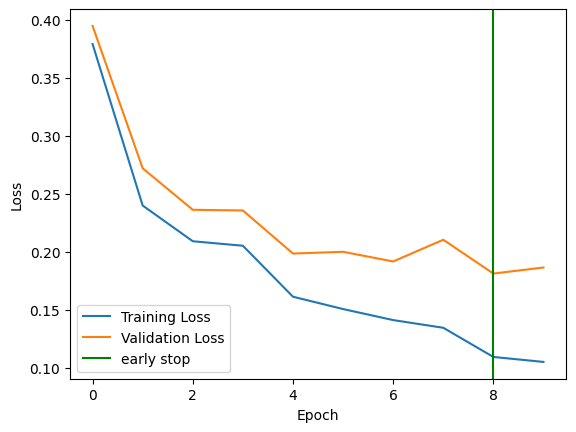

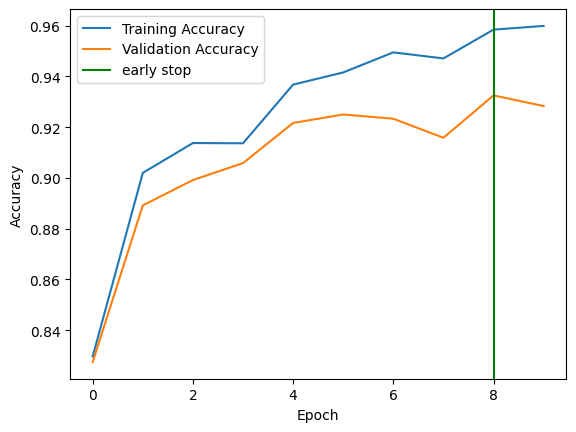

In [3]:
my_model.plot_loss()
my_model.plot_accuracy();

In our example, you can see from the figures, gap between the last epoch (9) and the best epoch (8) is closer than the patience (20 by default). It means the max_epoch parameter we imposed is too small, and the network training stopped before it could reach an optimum.

In order to correct that, we can increase the max_epoch parameter and continue training, or not set it at all but that could take a few hours.

In [4]:
my_model.train(dataset, continue_training=True)

11/15/2024 02:11:27 PM Creating DataLoaders...
11/15/2024 02:11:28 PM Starting Training with:
11/15/2024 02:11:28 PM Batch size: 128
11/15/2024 02:11:28 PM Learning rate: 0.0001
11/15/2024 02:11:28 PM Patience: 20
11/15/2024 02:11:29 PM Epoch: 9 // Batch 1/75 // loss = 0.08723
11/15/2024 02:11:30 PM Epoch: 9 // Batch 8/75 // loss = 0.10289
11/15/2024 02:11:31 PM Epoch: 9 // Batch 15/75 // loss = 0.07508
11/15/2024 02:11:33 PM Epoch: 9 // Batch 22/75 // loss = 0.11608
11/15/2024 02:11:34 PM Epoch: 9 // Batch 29/75 // loss = 0.12058
11/15/2024 02:11:35 PM Epoch: 9 // Batch 36/75 // loss = 0.15243
11/15/2024 02:11:36 PM Epoch: 9 // Batch 43/75 // loss = 0.10510
11/15/2024 02:11:38 PM Epoch: 9 // Batch 50/75 // loss = 0.05692
11/15/2024 02:11:39 PM Epoch: 9 // Batch 57/75 // loss = 0.09221
11/15/2024 02:11:40 PM Epoch: 9 // Batch 64/75 // loss = 0.15858
11/15/2024 02:11:42 PM Epoch: 9 // Batch 71/75 // loss = 0.16155
11/15/2024 02:11:48 PM Epoch: 9
11/15/2024 02:11:48 PM  [LOSS] TRAIN 0.09

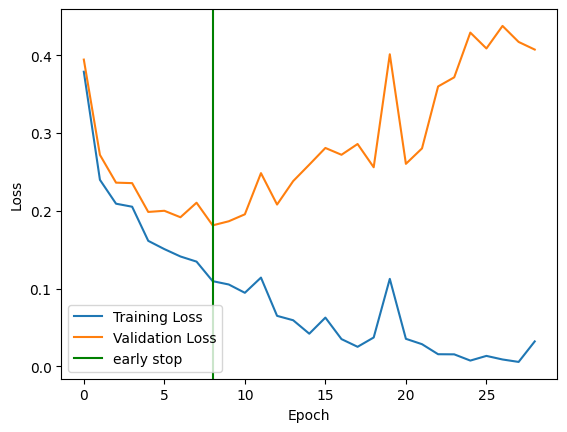

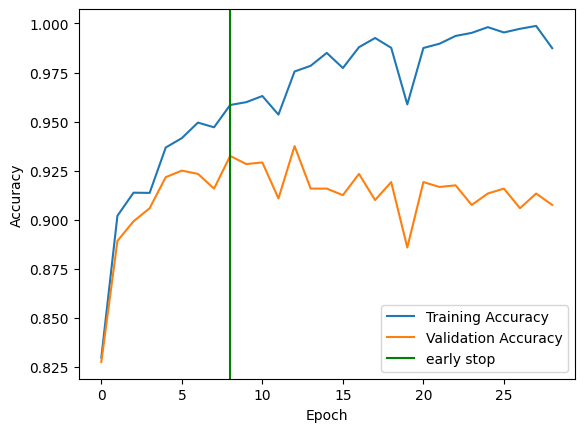

In [5]:
my_model.plot_loss()
my_model.plot_accuracy();

Now we have a better picture of the training process, and we can see that we stopped early, 20 epochs after the best epoch (8).

All training progress can be accessed through the tracker object inside the Model:

In [6]:
print("Content of tracker.progress dictionary:")
for key, value in my_model.tracker.progress.items():
    print(f"{key}, {type(value)}")

print("\nContent of tracker.best dictionary:")
for key, value in my_model.tracker.best.items():
    print(f"{key}, {value}")

Content of tracker.progress dictionary:
train_losses, <class 'list'>
train_accuracies, <class 'list'>
validation_losses, <class 'list'>
validation_accuracies, <class 'list'>

Content of tracker.best dictionary:
train_loss, 0.1094925183057785
train_accuracy, 0.9584375
validation_loss, 0.18129167219003042
validation_accuracy, 0.9325
epoch, 9
